In [19]:
import pandas as pd

In [20]:

df = pd.read_csv('sab-bma.csv')


In [21]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCACGGAATGCGCTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGGTAGGGCCTACCAAATAGGTTGCTCCTCCCGTAGGTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCAGGAGTAAGCCAC...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGGCGAGCCATTTTGTTA...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCCGTCCGCCAATTAAAGGTTGCTAGTAGT...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTATAGGGCACCGCAATTCCCAAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [22]:
from tqdm import tqdm


In [23]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [24]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [25]:
import difflib


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [27]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 82373.70it/s]


[0, 1, 2, 1, 10, 12, 18, 38, 63, 86, 115, 163, 228, 291, 353, 412, 500, 600, 709, 839, 925, 1042, 1150, 1278, 1447, 1618, 1757, 1905, 2081, 2265, 2413, 2537, 2686, 2809, 3027, 3207, 3360, 3483, 3629, 3859, 3962, 4103, 4223, 4396, 4529, 4697, 4764, 4920, 5076, 5190, 5270, 5396, 5486, 5656, 5716, 5763, 5659, 5545, 5529, 5386, 5295, 5226, 5061, 4985, 4950, 4677, 4625, 4494, 4376, 4189, 4091, 3907, 3706, 3578, 3395, 3242, 3047, 2962, 2761, 2632, 2433, 2310, 2173, 1963, 1836, 1661, 1494, 1407, 1239, 1102, 991, 861, 705, 621, 532, 451, 390, 301, 256, 189, 148, 95, 76, 39, 26, 15, 15, 4, 3, 1]


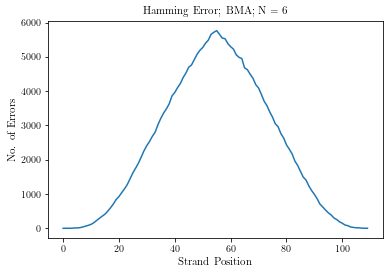

In [28]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-sab-bma-hamming.pdf', bbox_inches='tight')

In [29]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:11<00:00, 838.86it/s]


In [30]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


TTTC ->  6
TTAG ->  6
TTTA ->  6
 -> AAAAA 6
 -> AAGC 6
TGCT ->  6
TCGA ->  6
 -> AGAC 6
 -> AAAT 6
TGGA ->  6
GCGT ->  6
G -> AAAC 6
T -> AAC 6
 -> GCAA 6
TA -> GG 6
G -> ACAA 6
TA -> CG 6
CT -> GG 6
GG -> AC 6
 -> CCTC 6
 -> ATAC 6
 -> TACC 6
GCCT ->  6
 -> CAGA 6
 -> TGAA 6
 -> ATAT 6
 -> TAGA 6
G -> AAAA 6
GTT -> C 6
CAGT ->  6
C -> TAA 6
 -> TCAA 6
GATC ->  6
CTC -> A 6
 -> ATTC 6
ATG -> C 6
 -> GGAC 6
 -> GATA 6
GTAC ->  6
TCAG ->  6
G -> TCT 6
ACTG ->  6
AG -> CC 6
GTAT ->  6
ATCT ->  6
AG -> CT 6
 -> GTAG 6
GGCT ->  6
TCCA ->  6
 -> GAGA 6
AT -> CG 6
TAGC ->  6
GGTG ->  6
AT -> GC 6
 -> TTT 6
CG -> TA 6
 -> CTCT 6
 -> CAAA 6
 -> GGT 7
GGTA ->  7
CGGT ->  7
TTCG ->  7
CACT ->  7
CC -> T 7
GCTT ->  7
 -> GTT 7
 -> AATA 7
TTAC ->  7
 -> ATTA 7
CG -> AT 7
GGTC ->  7
CA -> GT 7
AC -> T 7
TTT -> G 7
AGCT ->  7
TAGA ->  7
TAG -> C 7
TACC ->  7
TGC -> A 7
GCG -> A 7
GTG -> C 7
T -> CGA 7
T -> GGG 7
TTGA ->  7
T -> GGC 7
TTG -> C 7
TT -> CC 7
 -> TCG 7
T -> CGC 7
T -> ACC 7
CGTG ->  8
G

TT ->  @ 80 6
GC -> T @ 55 6
 -> CG @ 52 6
GA ->  @ 64 6
GT ->  @ 40 6
A ->  @ 12 6
A -> T @ 85 6
C -> G @ 40 6
C -> T @ 84 6
C -> T @ 81 6
TT ->  @ 78 6
AC ->  @ 55 6
 -> ACC @ 57 6
GA ->  @ 36 6
G -> AA @ 62 6
A -> C @ 42 6
 -> GA @ 63 6
C -> G @ 42 6
GT ->  @ 36 6
 -> CA @ 67 6
C -> T @ 76 6
A ->  @ 15 6
 -> CAC @ 57 6
C -> T @ 40 6
GA ->  @ 63 6
C -> T @ 41 6
A -> C @ 74 6
T -> C @ 25 6
GT -> C @ 63 6
C -> A @ 95 6
GA ->  @ 50 6
C -> T @ 44 6
T -> C @ 16 6
 -> CT @ 48 6
CG ->  @ 85 6
T -> C @ 13 6
A -> C @ 51 6
GA ->  @ 57 6
CT ->  @ 45 6
G -> CA @ 60 6
GA ->  @ 74 6
GT ->  @ 30 6
 -> TG @ 58 6
G -> CA @ 54 6
TA ->  @ 61 6
 -> TA @ 66 6
A -> C @ 45 6
 -> CG @ 51 6
TA ->  @ 64 6
G ->  @ 11 6
 -> CA @ 44 6
C -> T @ 58 6
 -> AG @ 46 6
A -> C @ 57 6
TA ->  @ 33 6
 -> GA @ 60 6
AA ->  @ 57 6
 -> CG @ 50 6
A -> C @ 78 6
CC ->  @ 48 6
 -> TG @ 74 6
A -> C @ 73 6
A -> G @ 76 6
GT ->  @ 83 6
 -> A @ 98 6
 -> AT @ 52 6
 -> AT @ 58 6
 -> A @ 100 6
 -> AT @ 61 6
CG ->  @ 65 6
TG -> C @ 66 6
TT

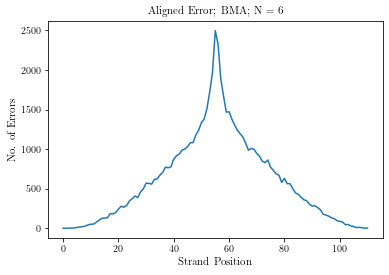

In [31]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-sab-bma-aligned.pdf', bbox_inches='tight')

In [32]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [33]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [34]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 0, 0, 0, 0, 2, 3, 2, 4, 3, 8, 10, 10, 9, 16, 13, 14, 18, 27, 32, 27, 35, 30, 39, 49, 44, 62, 47, 55, 55, 63, 56, 54, 63, 65, 82, 71, 68, 85, 66, 82, 99, 88, 86, 105, 67, 93, 98, 91, 95, 82, 84, 111, 104, 118, 137, 138, 109, 98, 95, 98, 84, 104, 124, 107, 97, 90, 71, 82, 93, 83, 80, 84, 92, 98, 82, 80, 72, 63, 62, 58, 63, 63, 52, 56, 47, 43, 45, 44, 45, 44, 32, 39, 31, 19, 18, 20, 19, 26, 17, 21, 12, 10, 9, 9, 8, 1, 5, 1, 2, 1]
[1, 0, 1, 1, 1, 1, 1, 3, 4, 7, 4, 4, 10, 5, 13, 14, 21, 22, 19, 20, 36, 27, 31, 36, 34, 34, 41, 49, 46, 53, 73, 53, 49, 51, 64, 64, 68, 75, 62, 73, 71, 78, 87, 76, 94, 87, 77, 94, 106, 110, 119, 128, 125, 124, 142, 202, 177, 112, 122, 115, 119, 140, 108, 115, 109, 85, 100, 71, 117, 86, 65, 88, 75, 71, 69, 60, 63, 66, 52, 49, 53, 52, 50, 47, 28, 29, 31, 28, 37, 24, 22, 24, 21, 28, 18, 13, 14, 13, 6, 9, 6, 11, 3, 0, 1, 2, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 2, 1, 1, 1, 5, 7, 7, 6, 11, 13, 10, 18, 10, 16, 16, 24, 17, 22, 26, 26, 28, 39, 36, 34, 39, 39, 42, 43, 41, 50, 4

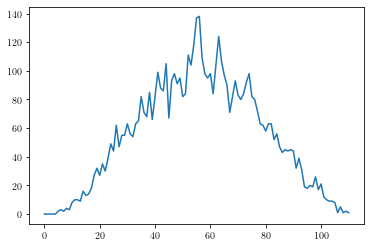

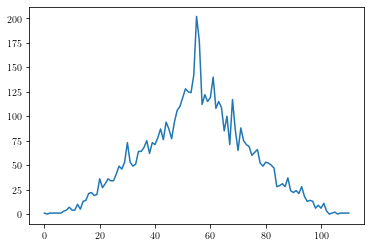

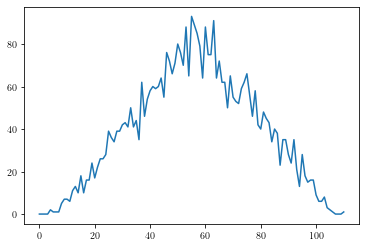

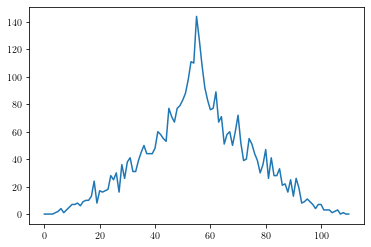

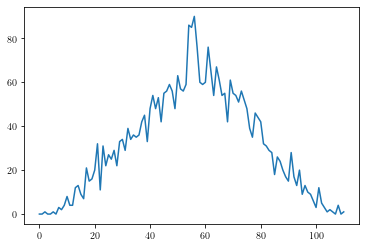

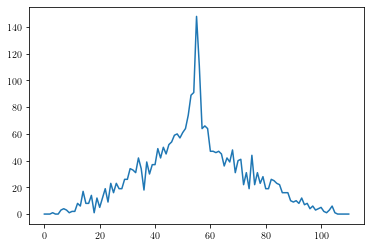

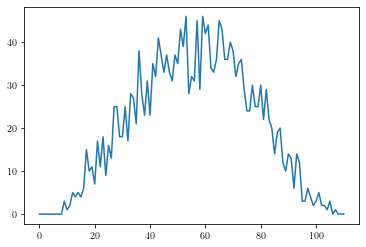

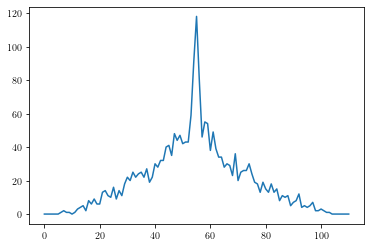

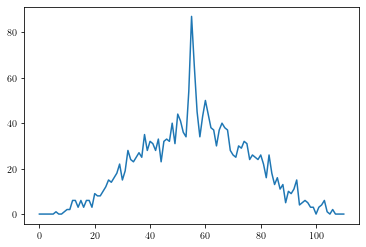

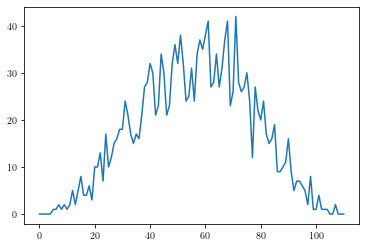

In [35]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [36]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)